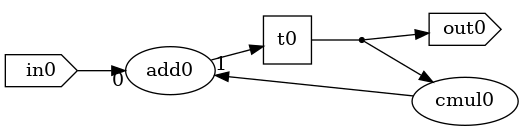

In [2]:
"""
==========================================
Introduction example for the TSTE87 course
==========================================
"""
from b_asic.core_operations import Addition, ConstantMultiplication
from b_asic.signal_flow_graph import SFG
from b_asic.special_operations import Delay, Input, Output

i = Input()
d = Delay()
o = Output(d)
c = ConstantMultiplication(0.5, d)
a = Addition(i, c)
d.input(0).connect(a)

sfg = SFG([i], [o])

# %%
# The SFG looks like:
sfg


Text(0.5, 1.0, 'Impulse response')

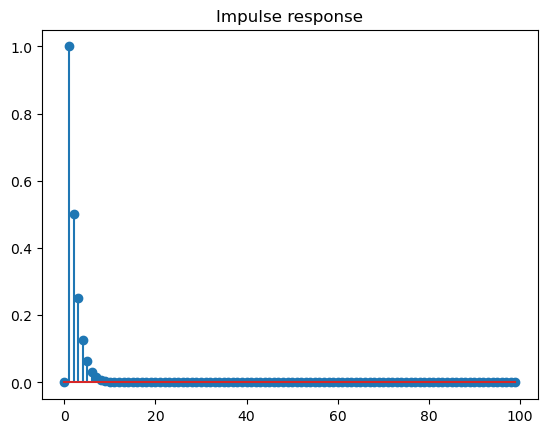

In [3]:
from b_asic.simulation import Simulation
import numpy as np
import matplotlib.pyplot as plt
from b_asic.signal_generator import Impulse
from mplsignal.freq_plots import freqz_fir

sim = Simulation(sfg, [Impulse()])
sim.run_for(100)

fig, ax = plt.subplots()
ax.stem(sim.results["0"])
plt.title("Impulse response")

/tmp/ipykernel_73259/1291124002.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


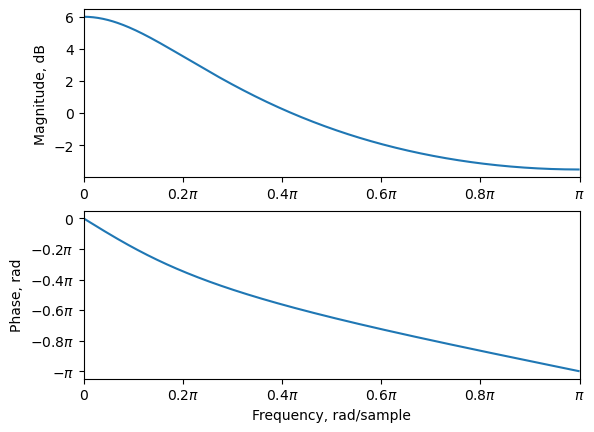

In [4]:
fig = freqz_fir(sim.results["0"])
fig.show()

Lowpass filter.